In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

import matplotlib.pyplot as plt
plt.rc('pdf', fonttype=42)
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))

BIG    = 22
MEDIUM = 20
FIGWIDTH = 12
WIDTH = 0.25  # the width of the bars
NARROW = 0.2
XLINE  = 523.21
YLINE  = 0.002
colors = ['#E27100', '#1b85b8', '#559e83', '#b26167']

# Starting to define standardized colors
MAE_COLOR =colors[1]
TIME_COLOR=colors[0]

In [2]:
df = pd.read_parquet('../df_master_joined.parquet')
df.master_index_P100 = df.master_index_P100.astype('int64') # Make sure index is integer
df.master_index_V100 = df.master_index_V100.astype('int64') # Make sure index is integer

In [3]:
v100_tp = df['dram_read_throughput_V100'] + df['dram_write_throughput_V100']
p100_tp = df['dram_read_throughput_P100'] + df['dram_write_throughput_P100']
diff = (v100_tp - p100_tp).abs()

In [13]:
filter_val = 300e9
df_problem = df[diff > filter_val]
P100_throughput = df_problem['dram_read_throughput_P100'] + df_problem['dram_write_throughput_P100']
df_problem = df_problem[P100_throughput < 10e9]
V100_throughput = df_problem['dram_read_throughput_V100'] + df_problem['dram_write_throughput_V100']
P100_throughput = df_problem['dram_read_throughput_P100'] + df_problem['dram_write_throughput_P100']

Mean Absolute Error: 624.67
Mean Absolute Percentage Error: 2979.4021542151972


/Users/yzamora/miniconda3/envs/python_work/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/yzamora/miniconda3/envs/python_work/lib/python3.6/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/yzamora/miniconda3/envs/python_work/lib/python3.6/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0.5,1,'Baseline Memory Throughput - MAE: 624.67')

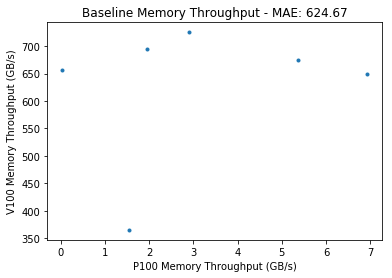

In [14]:
plt.plot(P100_throughput/1024/1024/1024, V100_throughput/1024/1024/1024,'.')
plt.xlabel('P100 Memory Throughput (GB/s)')
plt.ylabel('V100 Memory Throughput (GB/s)')
errors = abs(V100_throughput - P100_throughput)/1024/1024/1024
mean_error = round(np.mean(errors),2)
print('Mean Absolute Error:', round(np.mean(errors),2))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(P100_throughput/1024/1024/1024, V100_throughput/1024/1024/1024))
plt.title('Baseline Memory Throughput - MAE: ' + str(mean_error))

In [15]:
df_problem

,inst_per_warp_V100,kernelname_V100,branch_efficiency_V100,warp_execution_efficiency_V100,warp_nonpred_execution_efficiency_V100,inst_replay_overhead_V100,shared_load_transactions_per_request_V100,shared_store_transactions_per_request_V100,local_load_transactions_per_request_V100,local_store_transactions_per_request_V100,...,flop_hp_efficiency_P100,flop_sp_efficiency_P100,flop_dp_efficiency_P100,sysmem_read_utilization_P100,sysmem_write_utilization_P100,architecture_P100,application_name_P100,input_P100,memory_bound_P100,master_index_P100
unique_index,,,,,,,,,,,,,,,,,,,,,
compress_v1_compress,147.993804,compress,0.999995,0.999996,0.940030,0.002733,0.000000,0.000000,0.0,0.0,...,0.0,0.018720,0.000000,0.0,1.0,P100,srad,v1_compress,0.0,44174
extract_v1_extract,831.944524,extract,0.999999,0.999993,0.948161,0.016297,0.000000,0.000000,0.0,0.0,...,0.0,0.015115,0.000000,0.0,1.0,P100,srad,v1_extract,0.0,44175
prepare_v1_prepare,125.995389,prepare,0.999995,0.999996,0.953369,0.006496,0.000000,0.000000,0.0,0.0,...,0.0,0.000633,0.000000,0.0,1.0,P100,srad,v1_prepare,0.0,44176
reduce_v1_reduce,472.050696,reduce,0.965918,0.968479,0.803574,0.008621,1.052302,1.014131,0.0,0.0,...,0.0,0.000384,0.000000,0.0,1.0,P100,srad,v1_reduce,0.0,44177
srad_v1_srad,2889.796254,srad,0.999999,0.999993,0.949820,0.010100,0.000000,0.000000,0.0,0.0,...,0.0,0.037806,0.015122,0.0,1.0,P100,srad,v1_srad,0.0,44178
srad2_v1_srad2,192.990562,srad2,0.999995,0.999995,0.948833,0.001809,0.000000,0.000000,0.0,0.0,...,0.0,0.003873,0.003320,0.0,1.0,P100,srad,v1_srad2,0.0,44179
